# Práctica 2 - Aprendizaje Automático Complejidad de H y Modelos Lineales.

- <font color=red size=5>APELLIDOS: PERTÍÑEZ PEREA</font>
- <font color=red size=5>NOMBRE: FRANCISCO</font>
- <font color=red size=5>GRUPO DE PRÁCTICAS: 2</font>

________________
<font size = 5>**1. EJERCICIO SOBRE LA COMPLEJIDAD DE H Y EL RUIDO (5 puntos)**</font>

<font color = Sienna size= 4>En este ejercicio debemos aprender la dificultad que introduce la aparición de ruido en las etiquetas
a la hora de elegir la clase de funciones más adecuada.

Haremos uso de tres funciones incluidas en
el fichero template trabajo2.py:
</font>
- **simula_unif (N, dim, rango)**, que calcula una lista de N vectores de dimensión dim. Cada
vector contiene dim números aleatorios uniformes en el intervalo rango.

- **simula_gauss(N, dim, sigma)**, que calcula una lista de longitud N de vectores de dimensión
dim, donde cada posición del vector contiene un número aleatorio extraído de una distribucción
Gaussiana de media 0 y varianza dada, para cada dimension, por la posici ́on del vector sigma.

- **simula_recta(intervalo)**, que simula de forma aleatoria los parámetros, v = (a, b) de una
recta, y = ax + b, que corta al cuadrado [−50, 50] × [−50, 50]
</font>

<font color=DarkCyan>Introducimos las tres funciones del fichero trabajo2.py:</font>

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from time import time


# Fijamos la semilla
np.random.seed(1)


def simula_unif(N, dim, rango):
	return np.random.uniform(rango[0],rango[1],(N,dim))

def simula_gauss(N, dim, sigma):
    media = 0    
    out = np.zeros((N,dim),np.float64)        
    for i in range(N):
        # Para cada columna dim se emplea un sigma determinado. Es decir, para 
        # la primera columna (eje X) se usará una N(0,sqrt(sigma[0])) 
        # y para la segunda (eje Y) N(0,sqrt(sigma[1]))
        out[i,:] = np.random.normal(loc=media, scale=np.sqrt(sigma), size=dim)
    
    return out


def simula_recta(intervalo):
    points = np.random.uniform(intervalo[0], intervalo[1], size=(2, 2))
    x1 = points[0,0]
    x2 = points[1,0]
    y1 = points[0,1]
    y2 = points[1,1]
    # y = a*x + b
    a = (y2-y1)/(x2-x1) # Calculo de la pendiente.
    b = y1 - a*x1       # Calculo del termino independiente.
    
    return a, b

<font color = Sienna size= 4>1. (1 punto) Dibujar gráficas con las nubes de puntos simuladas con las siguientes condiciones:</font>

- **a)** Considere N = 50, dim = 2, rango = [−50, 50] con simula_unif (N, dim, rango).

- **b)** Considere N = 50, dim = 2 y sigma = [5, 7] con simula_gauss(N, dim, sigma).

<font color=DarkCyan>Primero mostramos la nube de puntos generada con simula_unif:</font>

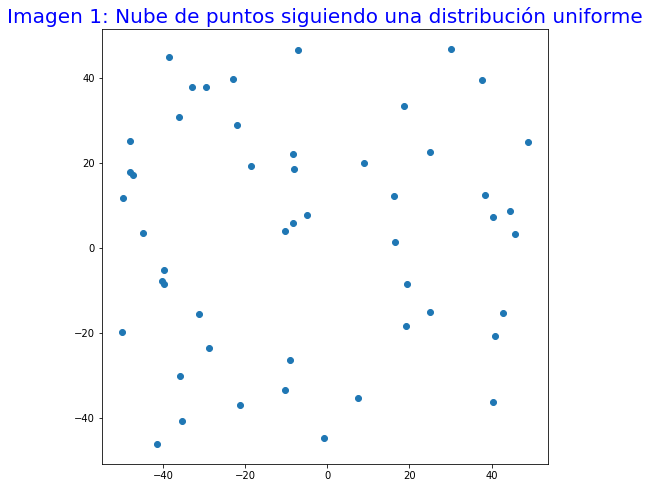

In [63]:
point_cloud_unif = simula_unif(50, 2, [-50,50])

plt.figure(figsize=(8,8))
plt.scatter(point_cloud_unif[:, 0], point_cloud_unif[:, 1])
plt.title('Imagen 1: Nube de puntos siguiendo una distribución uniforme', c = 'b',fontsize=20)
plt.show()  

<font color=DarkCyan>Ahora mostramos la nube de puntos siguiendo una distribución gaussiana:</font>

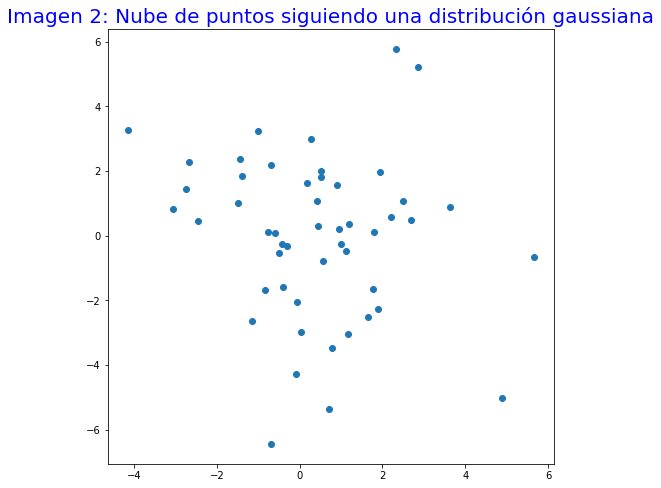

In [64]:
point_cloud_gauss = simula_gauss(50, 2, np.array([5,7]))

plt.figure(figsize=(8,8))
plt.scatter(point_cloud_gauss[:, 0], point_cloud_gauss[:, 1])
plt.title('Imagen 2: Nube de puntos siguiendo una distribución gaussiana', c = 'b',fontsize=20)
plt.show()  

<font color = Sienna size= 4>2. Vamos a valorar la influencia del ruido en la selecci ́on de la complejidad de la clase de funciones.

Con ayuda de la función simula_unif(100, 2, [−50, 50]) generamos una muestra de puntos 2D a los que vamos añadir una etiqueta usando el signo de la función f (x, y) = y − ax − b, es decir el signo de la distancia de cada punto a la recta simulada con simula_recta().</font>

<font color=DarkCyan>Introducimos las funciones que se nos proporcionan para este apartado en el fichero trabajo2.py:</font>

In [65]:
def signo(x):
	if x >= 0:
		return 1
	return -1

def f(x, y, a, b):
	return signo(y - a*x - b)


<font color=DarkCyan>Generamos los coeficientes a y b de la recta, la muestra de puntos 2D y le asignamos una etiqueta con la función f a cada punto.</font>

In [179]:
a, b = simula_recta([-50, 50])

point_cloud_unif = simula_unif(100, 2, [-50,50])

# Generamos las etiquetas
labels = np.zeros(point_cloud_unif.shape[0], np.float64)
for i in range(point_cloud_unif.shape[0]):
  labels[i] = f(point_cloud_unif[i, 0], point_cloud_unif[i, 1], a, b)

# Separamos los datos por etiqueta
point_neg_labels = point_cloud_unif[labels == -1]
point_pos_labels = point_cloud_unif[labels == 1]

<font color = Sienna size= 4>a) (1 punto) Dibujar un gráfico 2D donde los puntos muestren (use colores) el resultado de su etiqueta. Dibuje también la recta usada para etiquetar. Observe que todos los puntosestán bien clasificados respecto de la recta.</font>

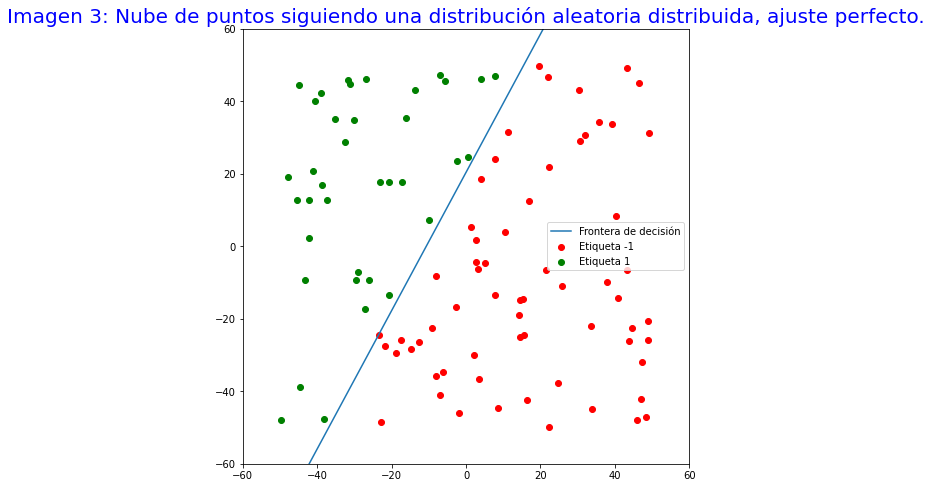

In [180]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(point_neg_labels[:, 0], point_neg_labels[:, 1], c = 'red', label = 'Etiqueta -1')
ax.scatter(point_pos_labels[:, 0], point_pos_labels[:, 1], c = 'green', label = 'Etiqueta 1')

x = np.linspace(-50, 50, labels.shape[0])
y = a*x + b

ax.plot(x, y, label = "Frontera de decisión")

plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.title('Imagen 3: Nube de puntos siguiendo una distribución aleatoria distribuida, ajuste perfecto.', c = 'b',fontsize=20)
plt.legend()
plt.show()

<font color=DarkCyan>Tal y como decía el enunciado, en la imagen 3 se puede apreciar perfectamente como todos los puntos están clasificados de manera correcta.</font>

<font color = Sienna size= 4>b) (0.5 puntos) Modifique de forma aleatoria un 10 % de las etiquetas positivas y otro 10 %
de las negativas y guarde los puntos con sus nuevas etiquetas. Dibuje de nuevo la gráfica
anterior. Ahora habrá puntos mal clasificados respecto de la recta.</font>

<font color=DarkCyan>Creamos una función que añada dicho ruido:</font>

In [181]:
"""
Función para añadir ruido a las etiquetas de los datos

Parámetros:
  - point_neg_labels: puntos con etiqueta -1
  - point_pos_labels: puntos con etiqueta +1
  - percent: pocentaje de error en las etiquetas de cada tipo.

Return:
  - point_neg_labels: puntos con etiqueta -1 pero con ruido introducido
  - point_pos_labels: puntos con etiqueta +1 pero con ruido introducido
"""
def noise(point_neg_labels, point_pos_labels, percent):

  # Calculamos el número de muestras de cada tipo que se le cambiará
  # la etiqueta
  n_negatives = int(len(point_neg_labels) * percent)
  n_positives = int(len(point_pos_labels) * percent)

  # Hacemos una copia de los puntos
  point_neg_labels_noise = point_neg_labels.copy()
  point_pos_labels_noise = point_pos_labels.copy()

  # Los desordenamos aleatoriamente
  np.random.shuffle(point_neg_labels_noise)
  np.random.shuffle(point_pos_labels_noise)

  # Elegimos los puntos a los que le cambiaremos la etiqueta
  val_n = point_neg_labels_noise[0:n_negatives]
  val_p = point_pos_labels_noise[0:n_positives]

  # Eliminamos dichos punto del grupo al que pertenecen
  point_neg_labels_noise = point_neg_labels_noise[n_negatives:]
  point_pos_labels_noise = point_pos_labels_noise[n_positives:]

  # Los añadimos al otro tipo, es decir, le cambiamos la etiqueta
  point_neg_labels_noise = np.concatenate((point_neg_labels_noise, val_p), axis = 0)
  point_pos_labels_noise = np.concatenate((point_pos_labels_noise, val_n), axis = 0)

  return point_neg_labels_noise, point_pos_labels_noise

<font color=DarkCyan>Ponemos la función creada en uso y visualizamos los resultados:</font>

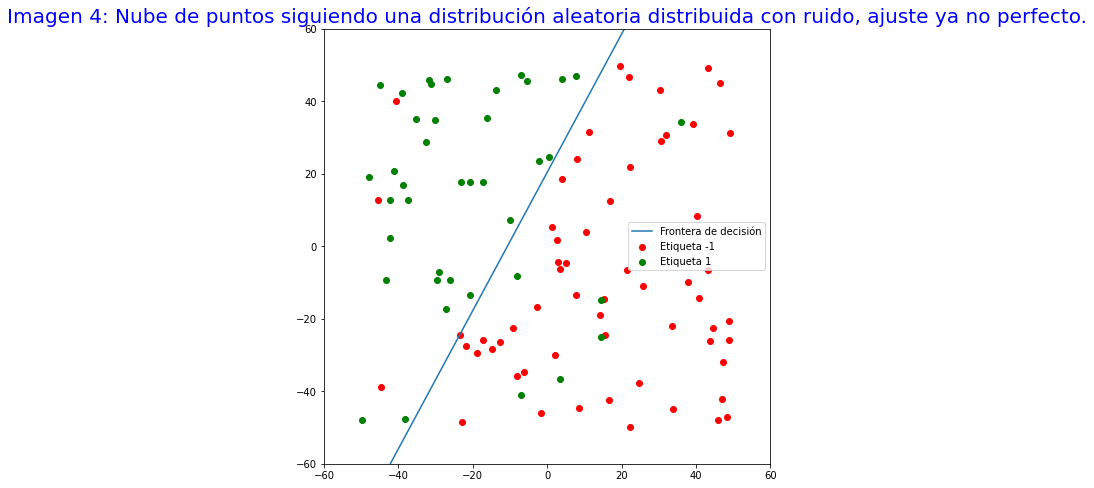

In [182]:
point_neg_labels_noise, point_pos_labels_noise = noise(point_neg_labels, point_pos_labels, 0.1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(point_neg_labels_noise[:, 0], point_neg_labels_noise[:, 1], c = 'red', label = 'Etiqueta -1')
ax.scatter(point_pos_labels_noise[:, 0], point_pos_labels_noise[:, 1], c = 'green', label = 'Etiqueta 1')

x = np.linspace(-50, 50, labels.shape[0])
y = a*x + b

ax.plot(x, y, label = "Frontera de decisión")

plt.xlim(-60, 60)
plt.ylim(-60, 60)
plt.title('Imagen 4: Nube de puntos siguiendo una distribución aleatoria distribuida con ruido, ajuste ya no perfecto.', c = 'b',fontsize=20)
plt.legend()
plt.show()

<font color=DarkCyan>Como se puede observar en la imagen 4, hemos introducido ruido en las etiquetas.</font>

<font color = Sienna size= 4>c) (2.5 puntos) Supongamos ahora que las siguientes funciones definen la frontera de clasificación de los puntos de la muestra en lugar de una recta<font>

- f (x, y) = (x − 10)2 + (y − 20)2 − 400
- f (x, y) = 0,5(x + 10)2 + (y − 20)2 − 400
- f (x, y) = 0,5(x − 10)2 − (y + 20)2 − 400
- f (x, y) = y − 20x2 − 5x + 3

<font color = Sienna size= 4>Visualizar el etiquetado generado en el apartado 2b junto con la gráfica de cada una de las funciones. Comparar las regiones positivas y negativas de estas nuevas funciones con las obtenidas en el caso de la recta. Argumente si estas funciones más complejas son mejores clasificadores que la función lineal. Observe las gráficas y diga qué consecuencias extrae sobre la influencia de la modificación de etiquetas en el proceso de aprendizaje. Explique el razonamiento.</font>

<font color=DarkCyan>Introducimos las funciones que se nos proporcionan para este apartado en el fichero trabajo2.py:</font>

In [183]:
def plot_datos_cuad(X, y, fz, title='Point cloud plot', xaxis='x axis', yaxis='y axis'):
    #Preparar datos
    min_xy = X.min(axis=0)
    max_xy = X.max(axis=0)
    border_xy = (max_xy-min_xy)*0.01
    
    #Generar grid de predicciones
    xx, yy = np.mgrid[min_xy[0]-border_xy[0]:max_xy[0]+border_xy[0]+0.001:border_xy[0], 
                      min_xy[1]-border_xy[1]:max_xy[1]+border_xy[1]+0.001:border_xy[1]]
    grid = np.c_[xx.ravel(), yy.ravel(), np.ones_like(xx).ravel()]
    pred_y = fz(grid)
    # pred_y[(pred_y>-1) & (pred_y<1)]
    pred_y = np.clip(pred_y, -1, 1).reshape(xx.shape)
    
    #Plot
    f, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, pred_y, 50, cmap='RdBu',vmin=-1, vmax=1)
    ax_c = f.colorbar(contour)
    ax_c.set_label('$f(x, y)$')
    ax_c.set_ticks([-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, linewidth=2, 
                cmap="RdYlBu", edgecolor='white')
    
    XX, YY = np.meshgrid(np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]),np.linspace(round(min(min_xy)), round(max(max_xy)),X.shape[0]))
    positions = np.vstack([XX.ravel(), YY.ravel()])
    ax.contour(XX,YY,fz(positions.T).reshape(X.shape[0],X.shape[0]),[0], colors='black')
    
    ax.set(
       xlim=(min_xy[0]-border_xy[0], max_xy[0]+border_xy[0]), 
       ylim=(min_xy[1]-border_xy[1], max_xy[1]+border_xy[1]),
       xlabel=xaxis, ylabel=yaxis)
    plt.title(title)
    plt.show()

<font color=DarkCyan>Adaptamos el formato de los datos para poder usar la función:</font>

In [184]:
neg_point_and_label = np.c_[point_neg_labels_noise, np.ones(point_neg_labels_noise.shape[0]) * -1]
pos_point_and_label = np.c_[point_pos_labels_noise, np.ones(point_pos_labels_noise.shape[0])]

point_and_label_noise = np.concatenate((neg_point_and_label, pos_point_and_label), axis = 0)

<font color=DarkCyan>Creamos funciones que definan las funciones f:</font>

In [185]:
def f_0(x):
  return (x[:, 0] - 10)**2 + (x[:, 1] - 20)**2 - 400

def f_1(x):
  return 0.5 * (x[:, 0] + 10)**2 + (x[:, 1] - 20)**2 - 400

def f_2(x):
  return 0.5 * (x[:, 0] - 10)**2 - (x[:, 1] + 20)**2 - 400

def f_3(x):
  return x[:, 1] - 20 * x[:, 0]**2 - 5 * x[:, 0] + 3

<font color=DarkCyan>Ahora ya si que podemos usar la función de visualización:</font>

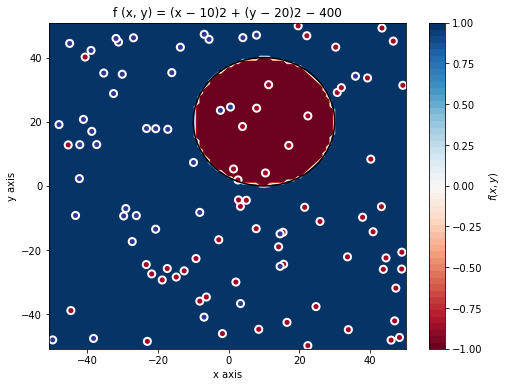

In [186]:
plot_datos_cuad(point_and_label_noise[:, :2], point_and_label_noise[:, 2], f_0, 'f (x, y) = (x − 10)2 + (y − 20)2 − 400')

<font color=DarkCyan>Vemos como la función es una circunferencia</font>

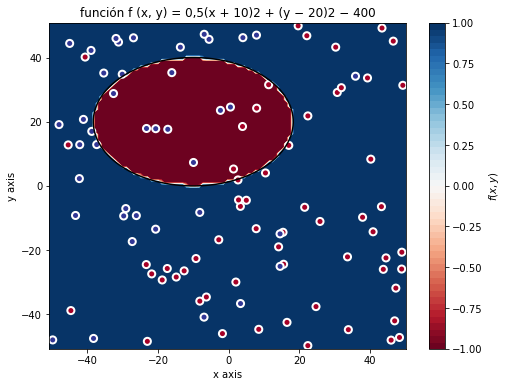

In [187]:
plot_datos_cuad(point_and_label_noise[:, :2], point_and_label_noise[:, 2], f_1, 'función f (x, y) = 0,5(x + 10)2 + (y − 20)2 − 400')

<font color=DarkCyan>En este caso la función es una elípse</font>

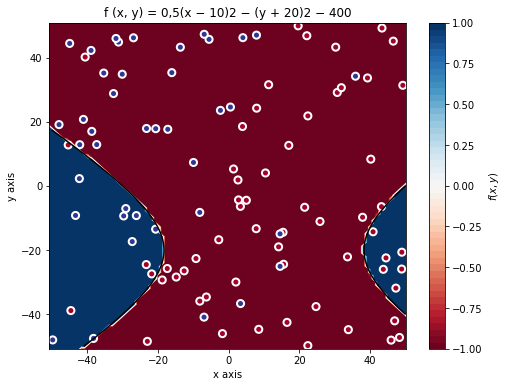

In [188]:
plot_datos_cuad(point_and_label_noise[:, :2], point_and_label_noise[:, 2], f_2, 'f (x, y) = 0,5(x − 10)2 − (y + 20)2 − 400')

<font color=DarkCyan>En este caso la función abarca parte de los dos extremos de la franja que se está analizando</font>

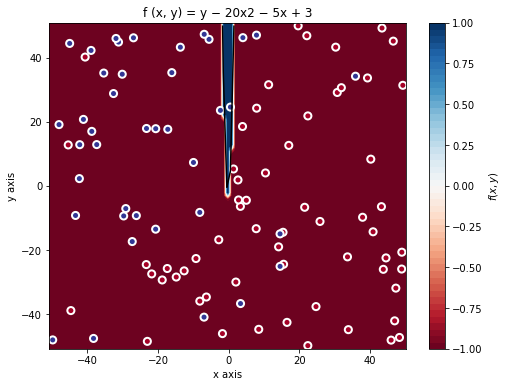

In [189]:
plot_datos_cuad(point_and_label_noise[:, :2], point_and_label_noise[:, 2], f_3, 'f (x, y) = y − 20x2 − 5x + 3')

<font color=DarkCyan>Esta función abarca una pequeña franja en la zona central y clasifica todas las muestras de la misma manera</font>

<font color=DarkCyan>En rasgos generales, a diferencia de la recta que solo usa características lineales, las 4 funciones que hemos visualizado tambien presentan características no lineales. Como consecuencia de eso, al haberse clasificado las muestras según un modelos lineal, no va a ser muy bien clasificados por funciones con características no lineales.

Con esto se demuestra que no por tener una función muy compleja va a clasificar mejor los datos, lo que importa es que el modelo sea uno que se adapte a las características del problema. Lo que si es cierto es que cuando un muestra presenta ruido, no puede existir un modelo lineal que clasifique perfectamente a las muestras, mientras que si puede existir modelos no lineales que las clasifique perfectamente las muestras</font>

__________
<font size = 5>**2. MODELOS LINEALES (7 puntos)**</font>

<font color = Sienna size= 4>
1. (3 puntos) Algoritmo Perceptrón (PLA).
Implementar la función ajusta_PLA(datos, label, max iter, vini) que calcula el hiperplano
solución a un problema de clasificacin binaria usando el algoritmo PLA. La entrada datos es
una matriz donde cada item con su etiqueta está representado por una fila de la matriz, label
el vector de etiquetas (cada etiqueta es un valor +1 o -1), max iter es el número máximo de
iteraciones permitidas y vini el valor inicial del vector. La función devuelve los coeficientes
del hiperplano.</font>

<font color=DarkCyan>Implementamos la función ajusta_PLA:</font>

In [190]:
"""
Función que implementa el algoritmo de aprendizaje Perceptrón.

Parámetros:
  - datos: muestra de datos con los que va a trabajar el algoritmo.
  - label: etiquetas asociadas a las muestras
  - max_iter: número máximo de iteraciones.
  - vini: vector inicial de pesos.

Return:
  - w_act: vector de pesos final.
  - número de iteracciones que se han necesitado para obtener el vector de pesos final
"""
def ajusta_PLA(datos, label, max_iter, vini):
    # Inicializamos el vector de pesos actual y anterior
    w_act = vini
    w_ant = w_act + 1

    # Añadimos la característica artificial a cada muestra
    datos = np.c_[np.ones(datos.shape[0]), datos]

    it = 0

    # Mientras haya muestras mal clasificadas y no se haya llegado al máximo de
    # iteraciones
    while it < max_iter and np.array_equal(w_act, w_ant) == False:
      w_ant = w_act
      it += 1

      for i in range(label.shape[0]):
        # si la muestra es mal clasificada modificamos le vector de pesos para
        # clasificarla correctamente
        if np.sign(np.dot(w_act.T, datos[i])) != label[i]:
          w_act = w_act + label[i] * datos[i]
      
    return w_act, it

<font color = Sienna size= 4>a) Ejecutar el algoritmo PLA con los datos empleados en el apartado 2a del ejercicio 1.
Inicializar el algoritmo con: i) el vector cero y, ii) con vectores de números aleatorios en [0,
1] (10 veces). Anotar el número medio de iteraciones necesarias en ambos para converger.
Se deben mostrar en una tabla cada uno de los pesos iniciales empleados, los finales
(obtenidos tras el proceso de entrenamiento), y el porcentaje de error de clasificaci ́on.
Valorar el resultado relacionando el punto de inicio con el número de iteraciones.</font>

<font color=DarkCyan>Definimos una función con la que calcular el porcentaje de erro en la clasificación por un modelo lineal:</font>

In [191]:
"""
Función que calcula el porcentaje de fallo de un modelo lineal
respecto a un conjunto de muestras.

Parámetros:
  - x: matriz en la que cada fila representa el vector de caracteristicas de una muestra.
  - y: Vector de etiquetas de cada muestra.
  - w: Vector de pesos del modelo lineal.
"""
def porcentaje_fallo_modelo_lineal(x,y,w):
  fallos = 0
  n_samples = x.shape[0]

  # Para cada muestra evaluamos si la clasificación que ha hecho el modelo
  # es errónea, contabilizaremos cada fallo
  for i in range(n_samples):
    sign = w[0] + x[i,0]*w[1] + x[i,1]*w[2]

    if(sign >= 0 and not y[i] >= 0):
      fallos += 1
    elif(sign < 0 and not y[i] < 0):
      fallos +=1
  
  # Devolvemos el tanto por ciento de fallos
  return fallos / n_samples * 100

<font color=DarkCyan>También crearé una función que nos permita visualizar todas las rectas que se generaran</font>

In [150]:
def pinta_recta(w, i):
  a =(-w[0]/w[2])/(w[0]/w[1])
  b = (-w[0]/w[2])

  val_x = np.arange(-50, 50, 1)
  val_y = b + a * val_x

  # Condición para que solo se muestra una vez en la leyenda la frontera de decisión
  if i == 0:
    plt.plot(val_x, val_y, '-', label = 'Frontera de división', c = 'b')
    plt.legend()
  else:
    plt.plot(val_x, val_y, '-', c = 'b')

<font color=DarkCyan>Generamos le modelo que empieza con el vector de pesos inicial a cero:</font>

In [192]:
w, it = ajusta_PLA(point_cloud_unif, labels, 1000, np.zeros(3))

<font color=DarkCyan>Lo visualizamos:</font>

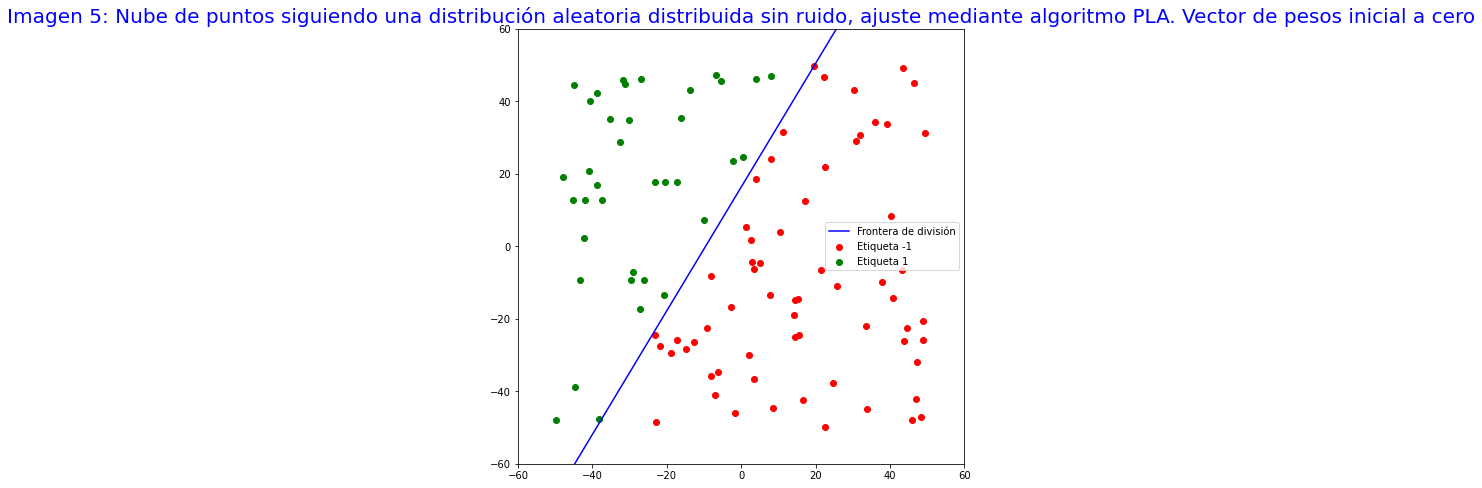

In [193]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(point_neg_labels[:, 0], point_neg_labels[:, 1], c = 'red', label = 'Etiqueta -1')
ax.scatter(point_pos_labels[:, 0], point_pos_labels[:, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-60, 60)
plt.ylim(-60, 60)

pinta_recta(w, 0)
plt.title('Imagen 5: Nube de puntos siguiendo una distribución aleatoria distribuida sin ruido, ajuste mediante algoritmo PLA. Vector de pesos inicial a cero', c = 'b',fontsize=20)
plt.show()

<font color=DarkCyan>Ahora sí, generamos los 10 modelos con el algoritmo PLA y guardamos los datos que se nos pide en el apartado:</font>

In [194]:
w_initial_list = []
w_final_list = []
i_list = []
p_fallo = []

for i in range(10):
  v_i = np.random.uniform(0, 1, 3)
  w_initial_list.append(v_i)
  w, it = ajusta_PLA(point_cloud_unif, labels, 1000, v_i)
  w_final_list.append(w)
  i_list.append(it)
  p_fallo.append(porcentaje_fallo_modelo_lineal(point_cloud_unif, labels, w))

<font color=DarkCyan>Visualizamos los distintos modelos que hemos obtenido:</font> 

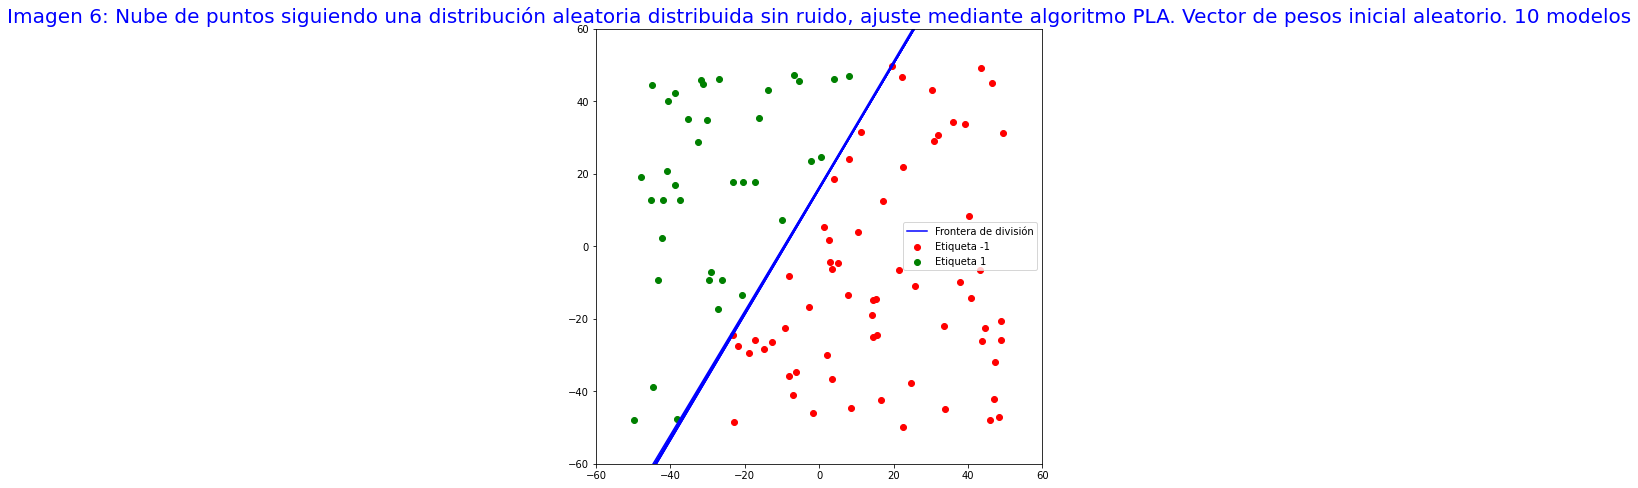

In [195]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(point_neg_labels[:, 0], point_neg_labels[:, 1], c = 'red', label = 'Etiqueta -1')
ax.scatter(point_pos_labels[:, 0], point_pos_labels[:, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-60, 60)
plt.ylim(-60, 60)

pinta_recta(w_final_list[0], 0)

for a in w_final_list:
  pinta_recta(a, 1)

plt.title('Imagen 6: Nube de puntos siguiendo una distribución aleatoria distribuida sin ruido, ajuste mediante algoritmo PLA. Vector de pesos inicial aleatorio. 10 modelos', c = 'b',fontsize=20)
plt.show()

media_i = np.mean(i_list)


<font color=DarkCyan>Visualizamos los datos almacenados:</font>

In [196]:
print("Número medio de iteraciones necesarias: ", media_i)

print("\n             W inicial:                                        W final                       Porcentaje de error en la clasificación")
print("-------------------------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
  print(w_initial_list[i], "           ", w_final_list[i], "                        ", p_fallo[i])

Número medio de iteraciones necesarias:  625.9

             W inicial:                                        W final                       Porcentaje de error en la clasificación
-------------------------------------------------------------------------------------------------------------------------------------------
[0.18251982 0.60470582 0.85752629]             [-1583.81748018  -173.02997426    99.8561281 ]                          0.0
[0.17277597 0.83062155 0.33363421]             [-1750.82722403  -183.17701686   107.19653024]                          0.0
[0.60824348 0.86085878 0.22954063]             [-1743.39175652  -185.99790577   108.11226588]                          0.0
[0.81466138 0.71275056 0.37271812]             [-1731.18533862  -187.6571349    108.68901977]                          0.0
[0.92078005 0.73604189 0.32425986]             [-1737.07921995  -187.06119687   108.53789359]                          0.0
[0.04898179 0.52362545 0.84734138]             [-1662.95101821  

<font color=DarkCyan>Podemos observar como al ser los datos linealmente separables las 10 rectas que se generan clasifican de manera perfecta las muestras. También vemos que dependiendo del vector de pesos inicial nos dá un modelo distinto, aunque todos clasifican perfectamente las muestras</font>

<font color = Sienna size= 4>b) Hacer lo mismo usando los datos del apartado 2b del ejercicio 1. ¿Observa algún comportamiento diferente? En caso afirmativo diga cúal y las razones para que ello ocurra.</font>

<font color=DarkCyan>Procedemos de igual manera que hemos hecho anteriormente con las muestras sin ruido:</font>

<font color=DarkCyan>Empezamos con el vector de pesos inicial a cero:</font>

In [197]:
w, it = ajusta_PLA(point_and_label_noise[:, :2], point_and_label_noise[:, 2], 1000, np.zeros(3))

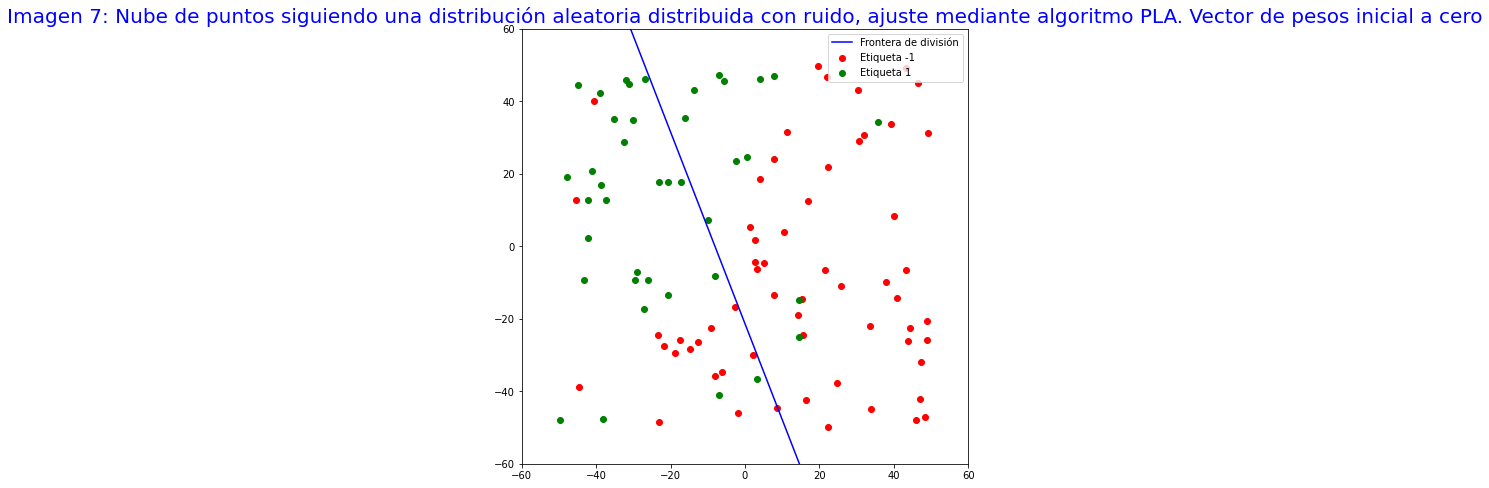

In [198]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(point_neg_labels_noise[:, 0], point_neg_labels_noise[:, 1], c = 'red', label = 'Etiqueta -1')
ax.scatter(point_pos_labels_noise[:, 0], point_pos_labels_noise[:, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-60, 60)
plt.ylim(-60, 60)

pinta_recta(w, 0)
plt.title('Imagen 7: Nube de puntos siguiendo una distribución aleatoria distribuida con ruido, ajuste mediante algoritmo PLA. Vector de pesos inicial a cero', c = 'b',fontsize=20)
plt.show()

<font color=DarkCyan>Y ahora generamos los 10 modelos de clasificación aleatorios a partir de vectores de pesos aleatorios:</font>

In [199]:
w_initial_list = []
w_final_list = []
i_list = []
p_fallo = []

for i in range(10):
  v_i = np.random.uniform(0, 1, 3)
  w_initial_list.append(v_i)
  w, it = ajusta_PLA(point_and_label_noise[:, :2], point_and_label_noise[:, 2], 1000, v_i)
  w_final_list.append(w)
  i_list.append(it)
  p_fallo.append(porcentaje_fallo_modelo_lineal(point_and_label_noise[:, :2], point_and_label_noise[:, 2], w))

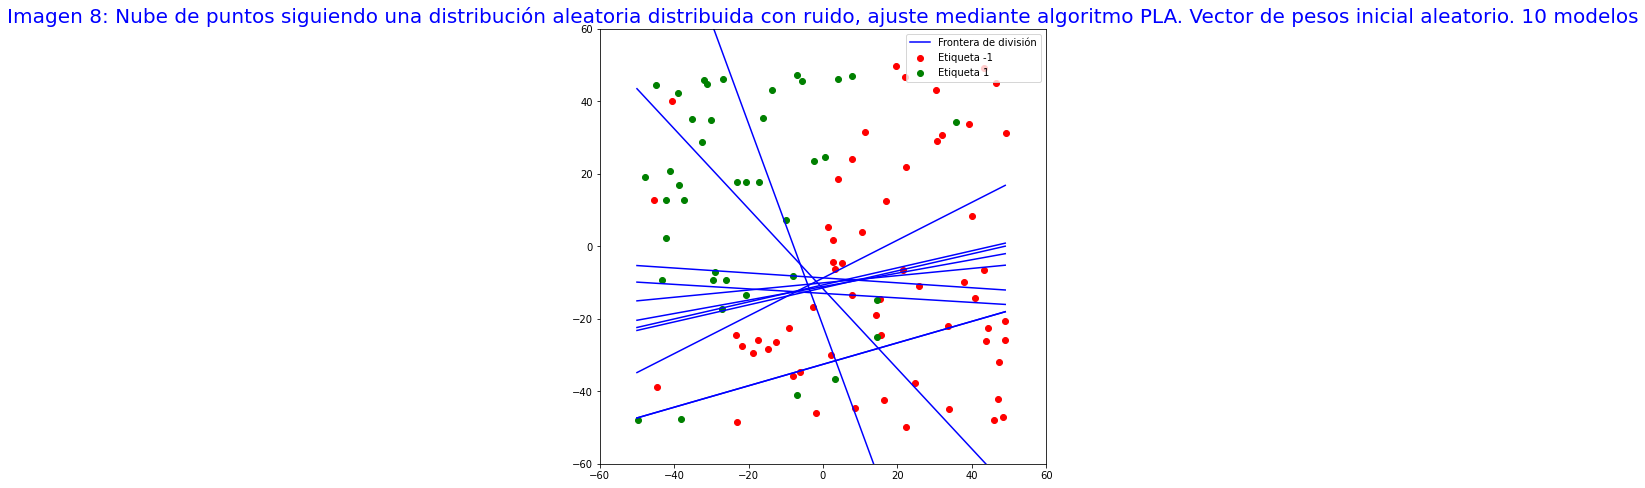

In [200]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.scatter(point_neg_labels_noise[:, 0], point_neg_labels_noise[:, 1], c = 'red', label = 'Etiqueta -1')
ax.scatter(point_pos_labels_noise[:, 0], point_pos_labels_noise[:, 1], c = 'green', label = 'Etiqueta 1')

plt.xlim(-60, 60)
plt.ylim(-60, 60)

pinta_recta(w_final_list[0], 0)

for a in w_final_list:
  pinta_recta(a, 1)

plt.title('Imagen 8: Nube de puntos siguiendo una distribución aleatoria distribuida con ruido, ajuste mediante algoritmo PLA. Vector de pesos inicial aleatorio. 10 modelos', c = 'b',fontsize=20)
plt.show()

media_i = np.mean(i_list)

<font color=DarkCyan>Visualizamos los datos almacenados:</font>

In [201]:
print("Número medio de iteraciones necesarias: ", media_i)

print("\n             W inicial:                                        W final                       Porcentaje de error en la clasificación")
print("-------------------------------------------------------------------------------------------------------------------------------------------")
for i in range(10):
  print(w_initial_list[i], "           ", w_final_list[i], "                        ", p_fallo[i])

Número medio de iteraciones necesarias:  1000.0

             W inicial:                                        W final                       Porcentaje de error en la clasificación
-------------------------------------------------------------------------------------------------------------------------------------------
[0.78454424 0.91336603 0.79496565]             [-246.21545576    2.23990076   -7.56487549]                          53.0
[0.18209941 0.18681809 0.6285453 ]             [-237.81790059   -1.86099771  -27.33517991]                          61.0
[0.01363077 0.09325408 0.62038807]             [-239.98636923    2.36769764  -23.83503352]                          68.0
[0.42781534 0.18262556 0.63674387]             [-228.57218466  -21.58504931  -19.55403012]                          41.0
[0.28952039 0.86274124 0.60663   ]             [-244.71047961    5.41020828  -23.01719522]                          70.0
[0.46132725 0.57341546 0.80804067]             [-231.53867275    3.865568

<font color=DarkCyan>
De nuevo, vemos como el vector de pesos inicial determina el vector de pesos final como anteriormente.

Comparando la imagen 5 con la 6 y los datos que hemos recabado en cada experimento observamos que mientras con muestras sin ruido el número de iteraciones medio para converger es siempre menor que el máximo establecido, en las muestras con ruido siempre coincide con este, es es debido a que al añadir el ruido los datos ya no son linealmente separables, por lo que el algoritmo nunca convergerá, esto queda claro al ver los porcentajes de error en la clasificación, los cuales en el caso de datos linealmente separables es 0 (la teoría dice que PLA siempre convergerá en tiempo finito con datos linealmente separables), y en datos no linealmente separables el error oscila entre 50-60% con las muestras que tenemos.</font>

<font color = Sienna size= 4>
2. (4 puntos) Regresión Logística (RL).
En este ejercicio emplearemos nuestra propia función objetivo f y un conjunto de datos D
para ver cómo funciona regresión logística. Consideraremos d = 2 para que los datos sean
fácilmente visualizables, y emplearemos X = [0, 2] × [0, 2] con probabilidad uniforme de elegir
cada x ∈ X . Elegir una línea en el plano que pase por X como la frontera que separa la región
en donde y toma valores +1 y -1. Para ello, seleccionar dos puntos aleatorios de X y calcular
la línea que pasa por ambos.

Impleméntese RL con Gradiente Descendente Estocástico (SGD) del siguiente modo:</font>

- Inicializar el vector de pesos con valores 0.

- Parar el algoritmo cuando ∥w(t+1) − w(t)∥ < 0,01, donde w(t) denota el vector de pesos
al final de la  ́epoca t. Recu ́erdese que una  ́epoca es un pase completo a trav ́es de los N
ejemplos de nuestro conjunto de datos.

- Aplicar una permutaciónn aleatoria de {1, 2,..., N} a los  ́ındices de los datos, antes de
usarlos en cada  ́epoca del algoritmo.

<font color=DarkCyan>Implementamos el algoritmo de Regresión Logística:</font>

In [209]:
"""
Función que calcula el gradiente en regresión logistica.

Parámetros:
  - x: características de una muestra.
  - y: etiqueta de la muestra.
  - w: vector de pesos
"""
def mini_batch_gradient(x, y, w):
  result = y*x/(1+np.exp(y*w.dot(x)))
  return -result


"""
Función que calcula el error en regresión logística.

Parámetros:
  - x: características de una muestra.
  - y: etiqueta de la muestra.
  - w: vector de pesos
"""
def error_reg(x, y, w):
  x = np.c_[np.ones(x.shape[0]), x]
  sum = 0.0 # variable donde guardaré el valor de la sumatoria
  n_samples = x.shape[0] # número de muestras

  for i in range(n_samples):
    v_sample = x[i] # vector de características de la muestra i-ésima
    label_sample = y[i] # etiqueta de la muestra i-ésima
    sum += np.log(1 + np.exp(-label_sample*w.T.dot(v_sample))) # calculo error cuadrático de la muestra y lo acumulo
  
  mean_sum = sum / n_samples # media de la sumatoria

  return mean_sum


"""
Función que implementa el algoritmo de descenso de gradiente estocástico
aplicado a regresión logística.

Parámetros:
  - x: conjunto de muestras.
  - y: etiquetas del conjunto de muestras.
  - max_iter: número máximo de iteraciones.
  - lr: Tasa de aprendizaje.
  - size_batch: tamaño de cada mini_batch

Return:
  - w: vectro de pesos final.
  - n_epocas: número de epocas que se han necesitado
"""
def sgdRL(x, y, max_iter, lr, size_batch):
  n_epocas = 0
  x = np.c_[np.ones(x.shape[0]), x]

  w = np.zeros(3, np.float64)
  w_ant = np.zeros(3, np.float64)
  n_samples = x.shape[0]
  it = 0
  indices = np.random.permutation(n_samples)
  n_epocas += 1

  min = 0
  max = size_batch

  # Mientras no se llegue al máximo de iteraciones
  while it < max_iter:
    if(min < n_samples and max > n_samples):
      max = n_samples

    indices_mini_batch = indices[min:max]

    # Calculamos gradiente
    for i in indices_mini_batch:
      w = w - lr * mini_batch_gradient(x[i], y[i], w)

    # Si la norma entre el vector de pesos anterior es menor a 0.01
    # hemos acabado
    if np.linalg.norm(w_ant - w) < 0.01:
      return w, n_epocas

    max += size_batch
    min += size_batch
    w_ant = w

    # Cuando hemos terminado con una época, creamos otra nueva
    if(min >= n_samples):
      indices = np.random.permutation(n_samples)
      n_epocas += 1
      min = 0
      max = size_batch

    it += 1

  return w, n_epocas

    

<font color = Sienna size= 4>A continuación, empleando la implementación anterior, real ́ıcese el siguiente experimento:
Seleccione N = 100 puntos aleatorios {xn} de X y evalúe las respuestas {yn} de todos
ellos respecto de la frontera elegida.</font>

<font color=DarkCyan>Generamos el conjunto de muestras que nos pide el enunciado: y lo visualizamos</font>

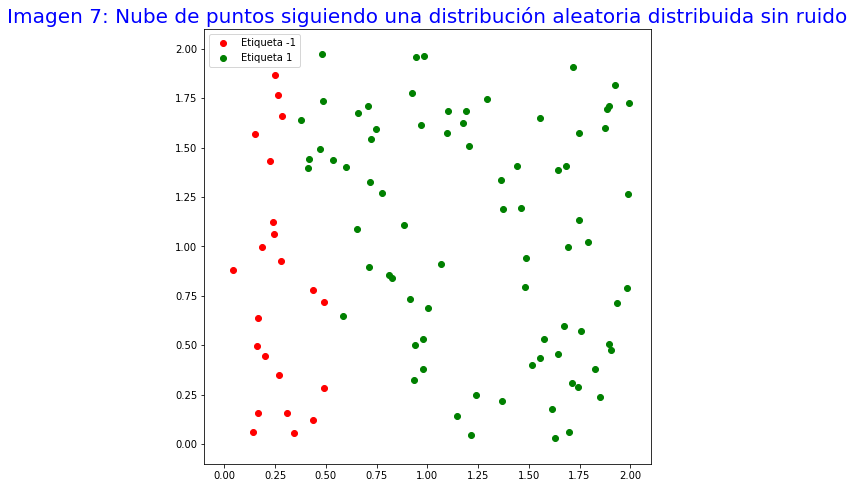

In [210]:
intervalo_reg = [0, 2]
N_reg = 100
dim = 2
a, b = simula_recta(intervalo_reg)

point_reg = simula_unif(N_reg, dim, intervalo_reg)

label_reg = np.sign(point_reg[:, 1] - a * point_reg[:, 0] - b)

# Generamos las etiquetas
label_reg = np.zeros(point_reg.shape[0], np.float64)
for i in range(point_reg.shape[0]):
  label_reg[i] = f(point_reg[i, 0], point_reg[i, 1], a, b)

plt.figure(figsize=(8,8))
plt.title('Imagen 7: Nube de puntos siguiendo una distribución aleatoria distribuida sin ruido', c = 'b',fontsize=20)
plt.scatter(point_reg[label_reg == -1, 0], point_reg[label_reg == -1, 1], c = 'red' , label = 'Etiqueta -1')
plt.scatter(point_reg[label_reg == 1, 0], point_reg[label_reg == 1, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
plt.legend()
plt.show()

<font color = Sienna size= 4>Ejecute RL para encontrar la función solución g,</font> 

<font color=DarkCyan>Ejecutamos el algoritmo, en mi caso experimentando el mejor learning rate y tamaño de cada minibatch es 0.1 y 64 respectivamente</font>

In [211]:
w, n_epocas = sgdRL(point_reg, label_reg, 1000, 0.1,64)

<font color=DarkCyan>Visualizamos el modelo que hemos obtenido</font>

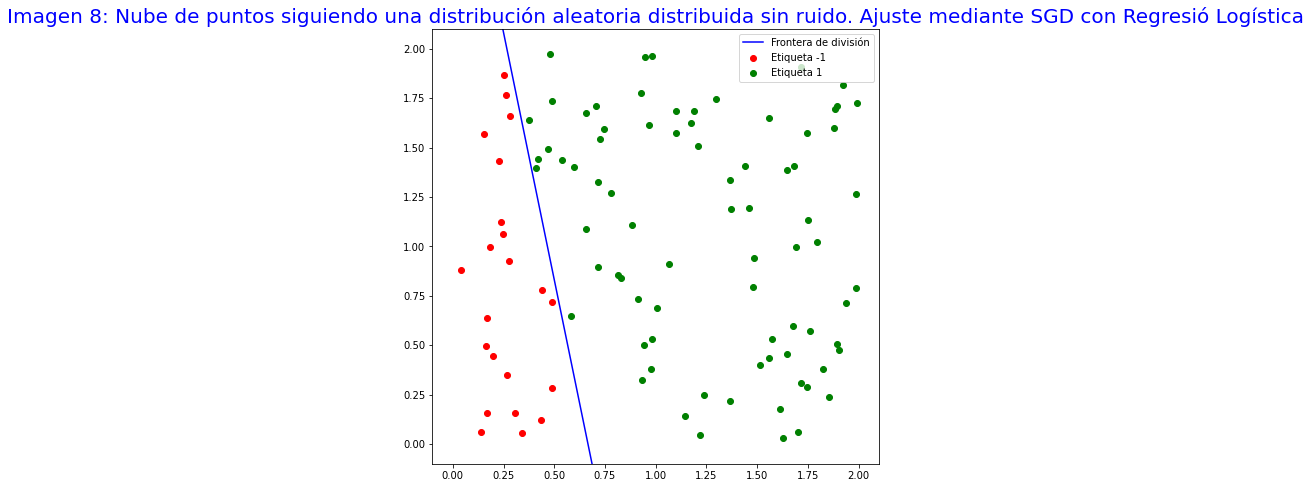

In [212]:
plt.figure(figsize=(8,8))
plt.title('Imagen 8: Nube de puntos siguiendo una distribución aleatoria distribuida sin ruido. Ajuste mediante SGD con Regresió Logística', c = 'b',fontsize=20)
plt.scatter(point_reg[label_reg == -1, 0], point_reg[label_reg == -1, 1], c = 'red', label = 'Etiqueta -1')
plt.scatter(point_reg[label_reg == 1, 0], point_reg[label_reg == 1, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
pinta_recta(w, 0)

plt.show()

<font color = Sienna size= 4>y evalúe el error Eout usando para
ello una nueva muestra de datos (> 999). Se debe escoger experimentalmente tanto el
learning rate (tasa de aprendizaje η) como el tamaño de batch.</font>

<font color=DarkCyan>Generamos las 1000 muestras y las visualizamos:</font>

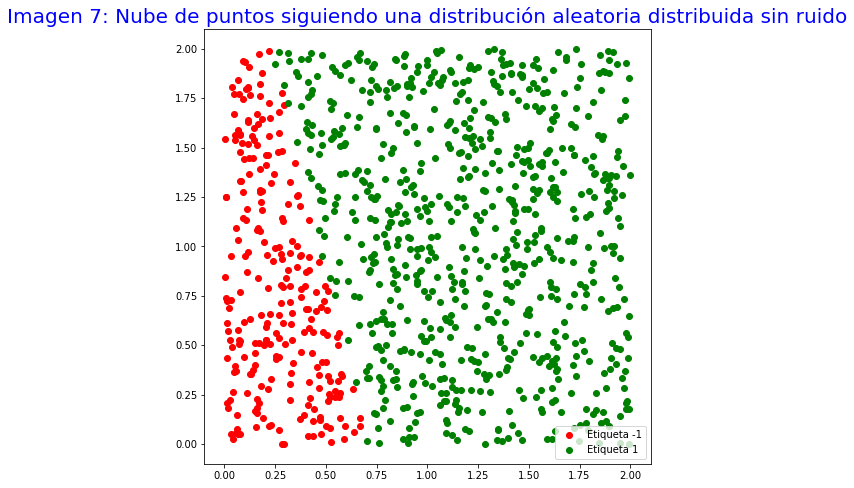

In [213]:
intervalo_reg = [0, 2]
N_reg = 1000
dim = 2

point_reg = simula_unif(N_reg, dim, intervalo_reg)

# Generamos las etiquetas
label_reg = np.zeros(point_reg.shape[0], np.float64)
for i in range(point_reg.shape[0]):
  label_reg[i] = f(point_reg[i, 0], point_reg[i, 1], a, b)

plt.figure(figsize=(8,8))
plt.title('Imagen 7: Nube de puntos siguiendo una distribución aleatoria distribuida sin ruido', c = 'b',fontsize=20)
plt.scatter(point_reg[label_reg == -1, 0], point_reg[label_reg == -1, 1], c = 'red', label = 'Etiqueta -1')
plt.scatter(point_reg[label_reg == 1, 0], point_reg[label_reg == 1, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
plt.legend()
plt.show()

<font color=DarkCyan>Visualimos como se ajusta el modelo que habíamos ajustado con 100 muestras en 1000.</font>

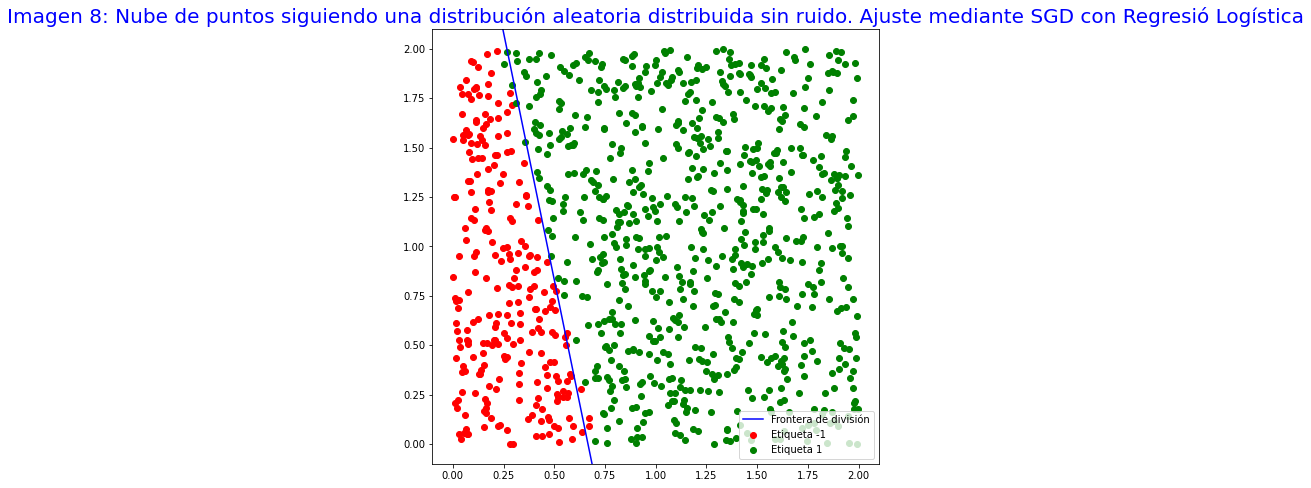

In [214]:
plt.figure(figsize=(8,8))
plt.title('Imagen 8: Nube de puntos siguiendo una distribución aleatoria distribuida sin ruido. Ajuste mediante SGD con Regresió Logística', c = 'b',fontsize=20)
plt.scatter(point_reg[label_reg == -1, 0], point_reg[label_reg == -1, 1], c = 'red', label = 'Etiqueta -1')
plt.scatter(point_reg[label_reg == 1, 0], point_reg[label_reg == 1, 1], c = 'green', label = 'Etiqueta 1')
plt.xlim(-0.1, 2.1)
plt.ylim(-0.1, 2.1)
pinta_recta(w, 0)

plt.show()

<font color=DarkCyan>Calculamos el error fuera de la muestra y el porcentaje de fallo:</font>

In [215]:
print("Eout: ",error_reg(point_reg, label_reg, w))

Eout:  0.061258795088725344


In [216]:
print("Porcentaje de fallo en la clasificación de las muestras: ", porcentaje_fallo_modelo_lineal(point_reg, label_reg, w))

Porcentaje de fallo en la clasificación de las muestras:  0.8999999999999999


<font color = Sienna size= 4>Repita el experimento 100 veces, y calcule los valores promedio de Eout, de porcentaje
de error de clasificación, y de  ́epocas necesarias para converger.</font>

<font color=DarkCyan>Creamos una función que realice el mismo experimento 100 veces:</font>

In [217]:
def rep_experimento():
  eoutM = 0
  percentM = 0
  n_epocasM = 0

  for i in range(100):  
    intervalo_reg = [0, 2]
    N_reg = 100
    dim = 2
    a, b = simula_recta(intervalo_reg)
    datos_reg = simula_unif(N_reg, dim, intervalo_reg)
    etq_reg = np.sign(datos_reg[:, 1] - a * datos_reg[:, 0] - b)

    w, n_epocas = sgdRL(datos_reg, etq_reg, 1000, 0.1,64)

    intervalo_reg = [0, 2]
    N_reg = 1000
    dim = 2
    datos_reg = simula_unif(N_reg, dim, intervalo_reg)
    etq_reg = np.sign(datos_reg[:, 1] - a * datos_reg[:, 0] - b)

    eoutM += error_reg(datos_reg, etq_reg, w)
    percentM += porcentaje_fallo_modelo_lineal(datos_reg, etq_reg, w)
    n_epocasM += n_epocas


  return eoutM/100.0, percentM/100.0, n_epocasM/100.0

<font color=DarkCyan>Calculamos el Eout, número de épocas y porcentaje de fallos en la clasificación medio:</font> 

In [218]:
eoutM, percentM, n_epocasM = rep_experimento()

In [219]:
print("Eout medio: ", eoutM)
print("Porcentaje de error en la clasificación medio: ", percentM)
print("Número de épocas necesarias medio: ", n_epocasM)

Eout medio:  0.05796219240868315
Porcentaje de error en la clasificación medio:  1.4549999999999996
Número de épocas necesarias medio:  353.13
